## This previous notebook is unnecessary-- Univariate_Multivarate_Regressions_02 updates this script!

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("white")
sns.set_context("talk")

### Data

In [34]:
# r'Users/amandaquay/Box\ Sync/90904_FinalProject/SanJoaquinSalinityML/
pathway = 'data_average_after_indices.csv'
df = pd.read_csv(pathway, index_col=0).dropna()     
# extract independent variables of use
df_small = df[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
               'slope', 'average_temperature', 'total_precipitation']]
df_small.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,average_temperature,total_precipitation
0,0.010,1.0,0.774290,66,328,1,285.08047,119.0
1,1.997,1.0,0.773924,66,340,0,285.08047,119.0
2,3.827,1.0,0.781937,66,152,0,285.08047,119.0
3,3.080,1.0,0.775323,66,151,0,285.08047,119.0
4,1.092,1.0,0.766537,66,149,0,285.08047,119.0


In [35]:
df_outlier_removed = df[df.Field_ID != 20.0]
print(df.size, "-->", df_outlier_removed.size, "samples when field 20 removed")

324005 --> 315755 samples when field 20 removed


In [36]:
df_small_outlier_removed = df_outlier_removed[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
                                               'slope', 'average_temperature', 'total_precipitation']]
df_small_outlier_removed.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,average_temperature,total_precipitation
0,0.010,1.0,0.774290,66,328,1,285.08047,119.0
1,1.997,1.0,0.773924,66,340,0,285.08047,119.0
2,3.827,1.0,0.781937,66,152,0,285.08047,119.0
3,3.080,1.0,0.775323,66,151,0,285.08047,119.0
4,1.092,1.0,0.766537,66,149,0,285.08047,119.0


In [124]:
df_fully_clean = df[df.Field_ID != 20.0]
df_fully_clean = df_fully_clean[df_fully_clean.Field_ID != 2.0]
df_fully_clean = df_fully_clean[df_fully_clean.Field_ID != 19.0]
df_small_fully_clean = df_fully_clean[['salinity', 'Field_ID', 'max_CRSI', 'elevation', 'aspect', 
                                               'slope', 'average_temperature', 'total_precipitation']]
df_small_fully_clean.head()

,salinity,Field_ID,max_CRSI,elevation,aspect,slope,average_temperature,total_precipitation
0,0.010,1.0,0.774290,66,328,1,285.08047,119.0
1,1.997,1.0,0.773924,66,340,0,285.08047,119.0
2,3.827,1.0,0.781937,66,152,0,285.08047,119.0
3,3.080,1.0,0.775323,66,151,0,285.08047,119.0
4,1.092,1.0,0.766537,66,149,0,285.08047,119.0


### Functions

In [8]:
# input:  dataframe, optional specification of field to leave out  (otherwise will select randomly)
# output: LOFO rows set as X_test (features) and y_test (target);
#         non-LOFO rows set as X_train (features) and y_train (target)

def train_test_split_lofo(df, test_field=None):
    fields = df['Field_ID'].unique()
    if test_field is None: test_field = np.array([np.random.choice(fields)])
    else: test_field=np.array([test_field])
    train_fields = np.setdiff1d(fields, test_field)

    test_field_indices = np.where(df['Field_ID'].isin(test_field))[0]
    train_field_indices = np.where(df['Field_ID'].isin(train_fields))[0]

    y = df['salinity'].values.reshape(-1,1)
    X = df.drop(['Field_ID', 'salinity'], axis=1).values

    y_train = y[train_field_indices]
    y_test = y[test_field_indices]
    X_train = X[train_field_indices]
    X_test = X[test_field_indices]

    return X_train, y_train, X_test, y_test

In [48]:
# input:  dataframe
# output: y_hat (predictions for y_test using X_test and model LinearRegression);
#         mse (mean sq. error comparing y_hat with y_test)

def cross_validate_lofo(df):
    
    y_hat = np.array([])
    coef_array = np.array([])
    intercept_array = np.array([])
    fields = df['Field_ID'].unique()
    
    for field in fields:
        X_train, y_train, X_test, y_test = train_test_split_lofo(df, field)
        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)
        y_hat = np.append(y_hat, model.predict(X_test)) # predictions
        coef_array = np.append(coef_array, model.coef_)
        intercept_array = np.append(intercept_array, model.intercept_)
        print(field, ": MSE =", np.mean((y_test - y_hat)**2))
    
    mse = np.mean((y - y_hat)**2)
    avg_coef = np.mean(coef_array)
    avg_intercept = np.mean(intercept_array)
    
    return y_hat, mse, avg_coef, avg_intercept

In [101]:
# input:  dataframe
# output: y_hat (predictions for y_test using X_test and model LinearRegression);
#         mse (mean sq. error comparing y_hat with y_test)

def cross_validate_lofo_multivar(df):
    
    y_hat = np.array([])
    coef_array_0 = np.array([])
    coef_array_1 = np.array([])
    coef_array_2 = np.array([])
    coef_array_3 = np.array([])
    coef_array_4 = np.array([])
    coef_array_5 = np.array([])
    intercept_array = np.array([])
    fields = df['Field_ID'].unique()
    
    for field in fields:
        X_train, y_train, X_test, y_test = train_test_split_lofo(df, field)
        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)
        y_hat = np.append(y_hat, model.predict(X_test)) # predictions
        coef_array_0 = np.append(coef_array_0, model.coef_[0][0])
        coef_array_1 = np.append(coef_array_1, model.coef_[0][1])
        coef_array_2 = np.append(coef_array_2, model.coef_[0][2])
        coef_array_3 = np.append(coef_array_3, model.coef_[0][3])
        coef_array_4 = np.append(coef_array_4, model.coef_[0][4])
        coef_array_5 = np.append(coef_array_5, model.coef_[0][5])
        intercept_array = np.append(intercept_array, model.intercept_)
        print(field, ": MSE =", np.mean((y_test - y_hat)**2))
    
    mse = np.mean((y - y_hat)**2)
    avg_coef_0 = np.mean(coef_array_0)
    avg_coef_1 = np.mean(coef_array_1)
    avg_coef_2 = np.mean(coef_array_2)
    avg_coef_3 = np.mean(coef_array_3)
    avg_coef_4 = np.mean(coef_array_4)
    avg_coef_5 = np.mean(coef_array_5)
    avg_intercept = np.mean(intercept_array)
    
    return y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept

In [11]:
# input: actual and predicted y_test, ylim and xlim optional if the frame needs to be expanded for some reason
# output: plot of actual and predicted salinity for test field(s)
def plot_actual_vs_predicted(actual, predicted, ylim=(0,40), xlim=(0,40)):
    plt.scatter(actual, predicted, s=5)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot((0,40),(0,40), linewidth=2, color='black')
    plt.xlabel('Actual Salinity (dS/m)')
    plt.ylabel('Predicted Salinity (dS/m)')
    plt.show()

In [74]:
def plot_actual_vs_predicted_fields(actual, predicted, field_list, in_ylim=(0,40), in_xlim=(0,40)):
    field_dict = { 1.0:[179,0,0],  2.0:[255,51,51],  3.0:[255,153,153],  4.0:[255,133,51],  5.0:[255,179,102],
              6.0:[255,255,26],  7.0:[172,230,0],  8.0:[115,153,0],  9.0:[0,102,34], 10.0:[0,204,102],
             11.0:[0,230,184], 12.0:[102,194,255], 13.0:[0,57,230], 14.0:[153,153,255], 15.0:[255,153,255],
             16.0:[204,0,204], 17.0:[122,0,204], 18.0:[191,128,64], 19.0:[102,51,0], 20.0:[0,0,0],
             21.0:[115,115,115], 22.0:[217,217,217]}
    # normalize this ish
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(in_xlim)
    plt.ylim(in_ylim)
    plt.tick_params(labelsize = 18)
    plt.plot((0,40),(0,40), linewidth=2, color='black')
    plt.xlabel('Actual Salinity (dS/m)', fontsize = 20)
    plt.ylabel('Predicted Salinity (dS/m)', fontsize = 20)
    for k, val in field_dict.items():
        for i in range(3): # normalize the RGB values so that matplotlib will allow as input
            field_dict[k][i] = field_dict[k][i]/255.0 
        # find all rows from same field, add to temp lists, and plot them
        temp_y = []
        temp_y_hat = []
        for i in range(len(field_list)): 
            if (k == field_list[i]):
                temp_y.append(actual[i])
                temp_y_hat.append(predicted[i])
        plt.scatter(temp_y, temp_y_hat, s = 5, c = val, label = k) # plot one field at a time to separate labels
    plt.legend(loc = 'upper left', bbox_to_anchor=(1,1), ncol = 2)
    ax.legend(markerscale=4, loc = 'upper left', bbox_to_anchor = (1,1), ncol = 2)
    plt.show()

### Univariate Linear Regression (LOFO): max_CRSI --> salinity
#### Full Dataset

In [49]:
# univariate using max_CRSI as sole feature
y = df['salinity'].values
X = df['max_CRSI'].values.reshape(len(df),1)

In [50]:
y_hat, mse, co, inter = cross_validate_lofo(df[['Field_ID', 'salinity', 'max_CRSI']])

1.0 : MSE = 63.222085790962275
2.0 : MSE = 68.98064646489625
3.0 : MSE = 36.84913111926726
4.0 : MSE = 31.168526078124778
5.0 : MSE = 23.50778894653793
6.0 : MSE = 33.82142888153817
7.0 : MSE = 32.727685729941335
8.0 : MSE = 16.55286820092874
9.0 : MSE = 16.695783324813412
10.0 : MSE = 91.09992410548611
11.0 : MSE = 46.768970059504255
12.0 : MSE = 56.618752227636286
13.0 : MSE = 45.60232563785231
14.0 : MSE = 23.336807882626786
15.0 : MSE = 30.02446433243987
16.0 : MSE = 39.31230559252185
17.0 : MSE = 23.58373204533556
18.0 : MSE = 106.25967966254345
19.0 : MSE = 15.153859237097384
20.0 : MSE = 534.1869765032071
21.0 : MSE = 61.218247699507906
22.0 : MSE = 52.929292512716884


In [52]:
print("The univariate prediction is: salinity = (%.3f * max_CRSI) + %.3f" %(co, inter))

The univariate prediction is: salinity = (94.751 * max_CRSI) + -106.987


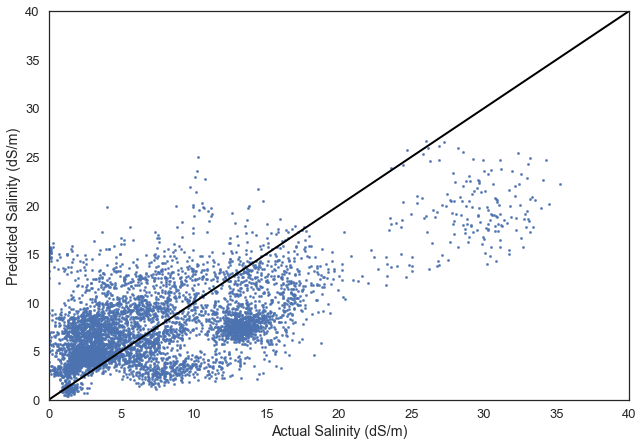

In [53]:
plot_actual_vs_predicted(y, y_hat)

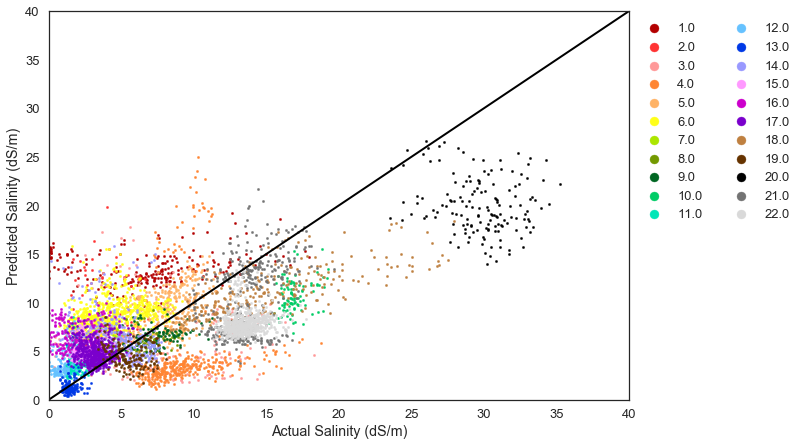

In [54]:
field_list = df['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [55]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 3.85
MSE: 23.03
RMSE: 3.85
R_squared: 0.39


#### Removing Outlier Field (Field #20)

In [56]:
# univariate using max_CRSI as sole feature
y = df_outlier_removed['salinity'].values
X = df_outlier_removed['max_CRSI'].values.reshape(len(df_outlier_removed),1)

In [57]:
y_hat, mse, co, inter = cross_validate_lofo(df_outlier_removed[['Field_ID', 'salinity', 'max_CRSI']])

1.0 : MSE = 49.03984233198163
2.0 : MSE = 55.3037855204318
3.0 : MSE = 30.089744412769132
4.0 : MSE = 25.17372672553572
5.0 : MSE = 18.028145143581302
6.0 : MSE = 27.186011297468482
7.0 : MSE = 26.054549629141775
8.0 : MSE = 11.842480439549723
9.0 : MSE = 12.443306601842103
10.0 : MSE = 92.98331881713408
11.0 : MSE = 40.34764685727061
12.0 : MSE = 50.212927866204495
13.0 : MSE = 39.849861448988186
14.0 : MSE = 18.435926218941294
15.0 : MSE = 25.369736330294042
16.0 : MSE = 34.71605127666425
17.0 : MSE = 19.8136487273987
18.0 : MSE = 103.12052692277723
19.0 : MSE = 10.659056056115846
21.0 : MSE = 58.38266303979057
22.0 : MSE = 50.91088957181932


In [93]:
print("The univariate prediction is: salinity = (%.3f * max_CRSI) + %.3f" %(co, inter))

The univariate prediction is: salinity = (-88.515 * max_CRSI) + 157.242


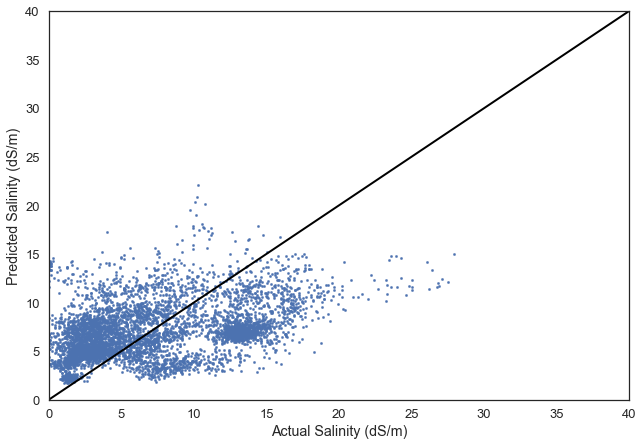

In [59]:
plot_actual_vs_predicted(y, y_hat)

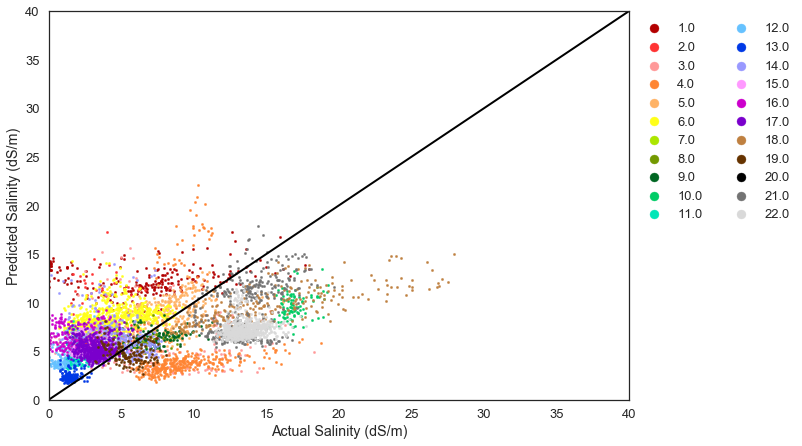

In [60]:
field_list = df_small_outlier_removed['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [61]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 3.82
MSE: 21.03
RMSE: 3.82
R_squared: 0.16


#### Removing Outlier Field (Field #20) AND The Exploration Fields (Fields 2 and 19)

In [62]:
# univariate using max_CRSI as sole feature
y = df_fully_clean['salinity'].values
X = df_fully_clean['max_CRSI'].values.reshape(len(df_fully_clean),1)

In [63]:
y_hat, mse, co, inter = cross_validate_lofo(df_fully_clean[['Field_ID', 'salinity', 'max_CRSI']])

1.0 : MSE = 52.487404069108514
3.0 : MSE = 35.60399557666445
4.0 : MSE = 28.41729448212545
5.0 : MSE = 20.21453949880807
6.0 : MSE = 30.09014648015114
7.0 : MSE = 28.983694001534197
8.0 : MSE = 13.396071949507071
9.0 : MSE = 13.704622684354193
10.0 : MSE = 90.23196584902013
11.0 : MSE = 42.9633829111705
12.0 : MSE = 52.89206547639675
13.0 : MSE = 42.01508140193719
14.0 : MSE = 19.816847016125116
15.0 : MSE = 26.8943031461352
16.0 : MSE = 36.375666016101924
17.0 : MSE = 20.982954143480928
18.0 : MSE = 102.10685251649286
21.0 : MSE = 56.81999258305904
22.0 : MSE = 49.37063815867382


In [94]:
print("The univariate prediction is: salinity = (%.3f * max_CRSI) + %.3f" %(co, inter))

The univariate prediction is: salinity = (-88.515 * max_CRSI) + 157.242


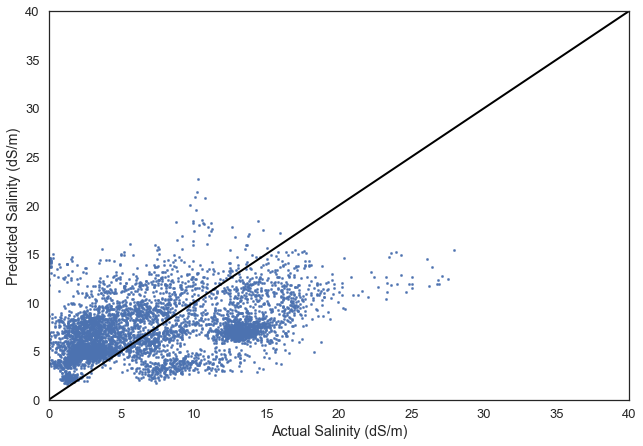

In [65]:
plot_actual_vs_predicted(y, y_hat)

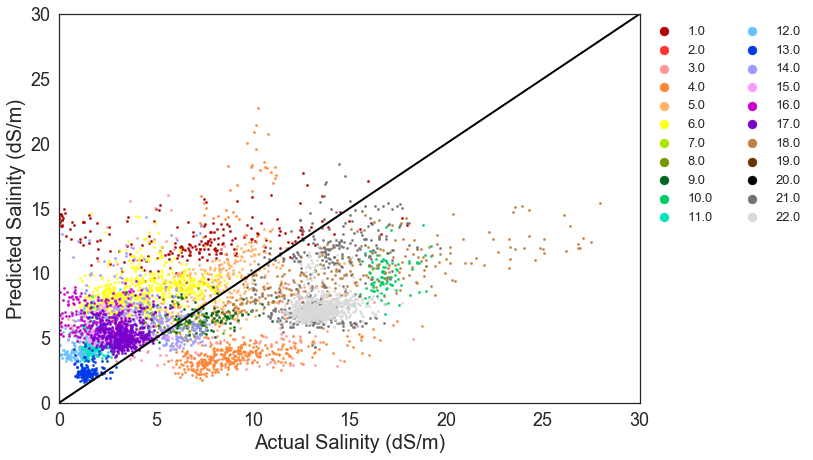

In [76]:
field_list = df_fully_clean['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list, in_ylim = (0,30), in_xlim = (0,30))

In [77]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 3.91
MSE: 21.75
RMSE: 3.91
R_squared: 0.16


### Multivariate Linear Regression (LOFO): max_CRSI, elevation, aspect, slope, margins, average_temperature, total_precipitation --> salinity 
#### Full Dataset

In [102]:
y = df_small['salinity'].values
drop_columns = [0, 1] # drop_columns: salinity and field ID
X = df_small.drop(df_small.columns[drop_columns], axis = 1).values

In [103]:
y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept = cross_validate_lofo_multivar(df_small)

# y_hat, mse, avg_coef, inter = cross_validate_lofo(df_small)

1.0 : MSE = 76.55175001644172
2.0 : MSE = 81.06844265718051
3.0 : MSE = 41.349103261651415
4.0 : MSE = 44.079648908570036
5.0 : MSE = 32.99454472649675
6.0 : MSE = 38.45767628294907
7.0 : MSE = 37.220809200263666
8.0 : MSE = 21.988476777785674
9.0 : MSE = 21.981316070174348
10.0 : MSE = 100.65557367979585
11.0 : MSE = 49.52475286980807
12.0 : MSE = 59.3017369640222
13.0 : MSE = 48.18820405063443
14.0 : MSE = 25.769254534685892
15.0 : MSE = 32.39847840480203
16.0 : MSE = 42.17219093096481
17.0 : MSE = 25.981958943675117
18.0 : MSE = 106.1037591736407
19.0 : MSE = 16.77330838398185
20.0 : MSE = 533.7164845536024
21.0 : MSE = 60.29845655675216
22.0 : MSE = 52.92727743852973


In [104]:
print("The multivariate prediction is: salinity = (%.3f * max_CRSI) + (%.3f * elevation) + (%.3f * aspect) + (%.3f * slope) + (%.3f * average_temperature) + (%.3f * total_precipitation) + %.3f" %(avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept))

The multivariate prediction is: salinity = (-106.431 * max_CRSI) + (-0.014 * elevation) + (0.000 * aspect) + (-2.658 * slope) + (-0.217 * average_temperature) + (0.001 * total_precipitation) + 157.242


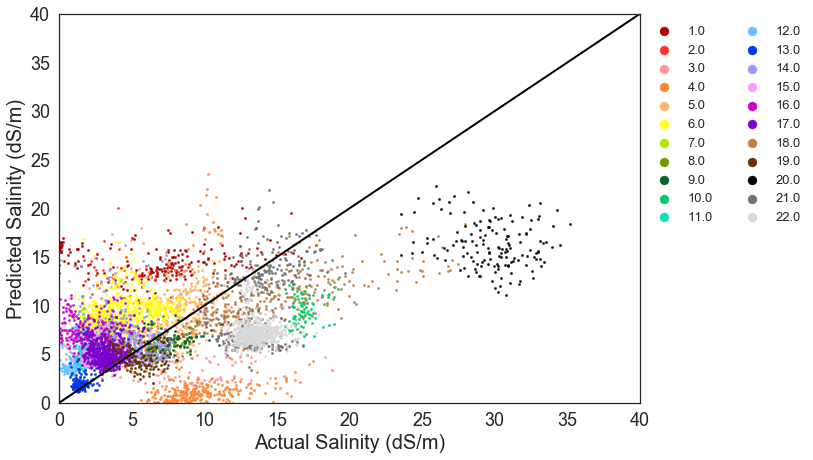

In [105]:
field_list = df['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [106]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 4.43
MSE: 30.55
RMSE: 4.43
R_squared: 0.19


#### Removing Outlier Field (Field #20)

In [107]:
y = df_small_outlier_removed['salinity'].values
drop_columns = [0, 1]

X = df_small_outlier_removed.drop(df_small.columns[drop_columns], axis = 1).values

In [109]:
y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept = cross_validate_lofo_multivar(df_small_outlier_removed)

# y_hat, mse, avg_coef, inter = cross_validate_lofo(df_small)
# y_hat, mse, co, inter = cross_validate_lofo(df_small_outlier_removed) # so now field 20 won't exist

1.0 : MSE = 64.71625588837651
2.0 : MSE = 69.10682103725246
3.0 : MSE = 33.50938856902431
4.0 : MSE = 31.620399231382912
5.0 : MSE = 22.805816089976577
6.0 : MSE = 33.68849325245867
7.0 : MSE = 32.55850513060549
8.0 : MSE = 16.42642907689615
9.0 : MSE = 16.705236115304615
10.0 : MSE = 95.04393375021667
11.0 : MSE = 44.20371747561904
12.0 : MSE = 53.752489340551186
13.0 : MSE = 43.17864341561952
14.0 : MSE = 21.33144832550074
15.0 : MSE = 27.7171153019842
16.0 : MSE = 36.74586746414508
17.0 : MSE = 22.61944333357864
18.0 : MSE = 103.53403115773075
19.0 : MSE = 12.85085297047005
21.0 : MSE = 59.20517270750653
22.0 : MSE = 52.95849467967561


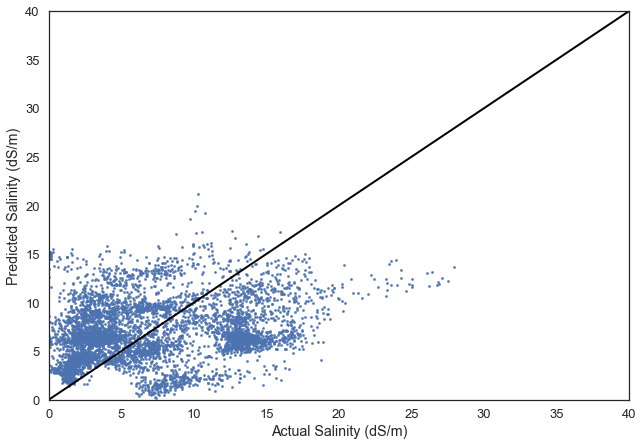

In [110]:
plot_actual_vs_predicted(y, y_hat)

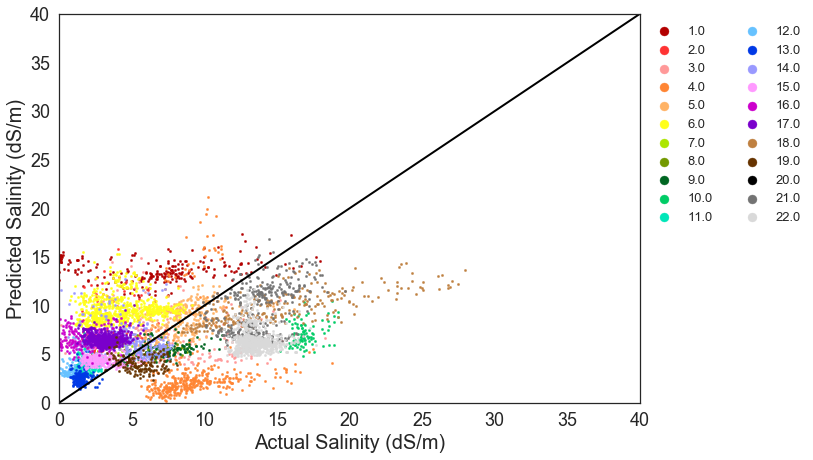

In [111]:
field_list = df_small_outlier_removed['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list)

In [112]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 4.27
MSE: 26.29
RMSE: 4.27
R_squared: -0.05


#### Removing Outlier Field (Field #20) AND the Explored Fields (#2, #19)

In [125]:
y = df_small_fully_clean['salinity'].values
drop_columns = [0, 1]

X = df_small_fully_clean.drop(df_small_fully_clean.columns[drop_columns], axis = 1).values

In [126]:
y_hat, mse, avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept = cross_validate_lofo_multivar(df_small_fully_clean)


1.0 : MSE = 69.34544494158662
3.0 : MSE = 41.827214193365855
4.0 : MSE = 38.54114563850013
5.0 : MSE = 27.49678361407342
6.0 : MSE = 38.15758669356196
7.0 : MSE = 37.01496061997087
8.0 : MSE = 19.381540364124692
9.0 : MSE = 19.26976918043865
10.0 : MSE = 93.87383702311537
11.0 : MSE = 47.528656172413946
12.0 : MSE = 57.04961202752214
13.0 : MSE = 45.89070174887405
14.0 : MSE = 23.280086519436235
15.0 : MSE = 29.55758670081814
16.0 : MSE = 38.49865616226724
17.0 : MSE = 24.44458725563471
18.0 : MSE = 103.12176189257008
21.0 : MSE = 57.78843599145876
22.0 : MSE = 51.476054267997675


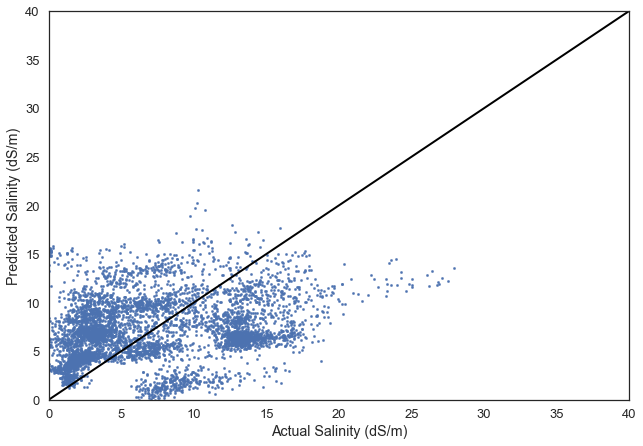

In [127]:
plot_actual_vs_predicted(y, y_hat)

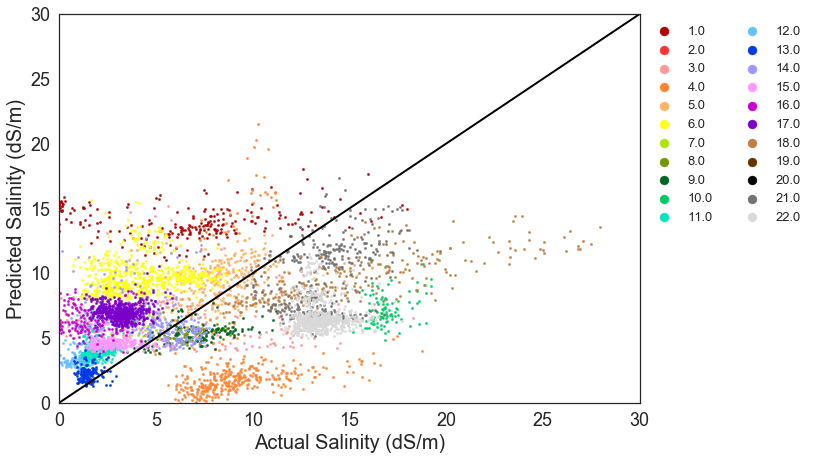

In [128]:
field_list = df_small_fully_clean['Field_ID'].values
plot_actual_vs_predicted_fields(y, y_hat, field_list, in_ylim=(0,30), in_xlim=(0,30))

In [129]:
print('MAE: %.2f' % np.mean(abs(y_hat - y)))
print('MSE: %.2f' % np.mean((y_hat-y)**2))
print('RMSE: %.2f' % np.mean(((y_hat-y)**2)**.5))
print('R_squared: %.2f' % r2_score(y, y_hat))

MAE: 4.42
MSE: 27.72
RMSE: 4.42
R_squared: -0.06


In [131]:
print("The multivariate prediction is: salinity = (%.5f * max_CRSI) + (%.3f * elevation) + (%.5f * aspect) + (%.3f * slope) + (%.3f * average_temperature) + (%.3f * total_precipitation) + %.3f" %(avg_coef_0, avg_coef_1, avg_coef_2, avg_coef_3, avg_coef_4, avg_coef_5, avg_intercept))

The multivariate prediction is: salinity = (-71.75166 * max_CRSI) + (0.003 * elevation) + (0.00009 * aspect) + (-2.295 * slope) + (-1.205 * average_temperature) + (-0.003 * total_precipitation) + 411.314
